# Covid Forecasting Using Machine Learning

# import Lib

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read Data

In [3]:
df = pd.read_csv("complete.csv")

In [4]:
df.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,30-01-2020,Kerala,10.8505,76.2711,1,0,0,0,0,0
1,31-01-2020,Kerala,10.8505,76.2711,1,0,0,0,0,0
2,01-02-2020,Kerala,10.8505,76.2711,2,0,0,1,0,0
3,02-02-2020,Kerala,10.8505,76.2711,3,0,0,1,0,0
4,03-02-2020,Kerala,10.8505,76.2711,3,0,0,0,0,0


In [5]:
df.tail()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
4687,06-08-2020,Telangana,18.1124,79.0193,73050,589,52103,2092,0,1289
4688,06-08-2020,Tripura,23.9408,91.9882,5725,31,3793,97,0,68
4689,06-08-2020,Uttar Pradesh,26.8467,80.9462,104388,1857,60558,4078,0,3287
4690,06-08-2020,Uttarakhand,30.0668,79.0193,8254,98,5233,246,0,386
4691,06-08-2020,West Bengal,22.9868,87.8550,83800,1846,58962,2816,0,2078


In [6]:
df.isna().sum()

Date                         0
Name of State / UT           0
Latitude                     0
Longitude                    0
Total Confirmed cases        0
Death                        0
Cured/Discharged/Migrated    0
New cases                    0
New deaths                   0
New recovered                0
dtype: int64

In [7]:
df['Name of State / UT'].unique()

array(['Kerala', 'Delhi', 'Telangana', 'Haryana', 'Rajasthan',
       'Uttar Pradesh', 'Tamil Nadu', 'Ladakh', 'Karnataka',
       'Maharashtra', 'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal',
       'Chhattisgarh', 'Chandigarh', 'Gujarat', 'Himachal Pradesh',
       'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram',
       'Andaman and Nicobar Islands', 'Goa', 'Assam', 'Jharkhand',
       'Arunachal Pradesh', 'Tripura', 'Meghalaya',
       'Dadara & Nagar Havelli', 'Sikkim', 'Nagaland'], dtype=object)

In [8]:
df.shape

(4692, 10)

In [9]:
#select one state
sta = ['Karnataka']
df1 = df[df['Name of State / UT']==sta[0]]

In [10]:
df1.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
74,09-03-2020,Karnataka,15.3173,75.7139,1,0,0,0,0,0
86,10-03-2020,Karnataka,15.3173,75.7139,4,0,0,3,0,0
98,11-03-2020,Karnataka,15.3173,75.7139,4,0,0,0,0,0
111,12-03-2020,Karnataka,15.3173,75.7139,4,1,0,0,0,0
124,13-03-2020,Karnataka,15.3173,75.7139,5,1,0,1,0,0


In [11]:
df1.tail()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
4532,02-08-2020,Karnataka,15.3173,75.7139,129287,2412,53648,5172,0,3860
4567,03-08-2020,Karnataka,15.3173,75.7139,134819,2496,57725,5532,0,4077
4602,04-08-2020,Karnataka,15.3173,75.7139,139571,2594,62500,4752,0,4775
4637,05-08-2020,Karnataka,15.3173,75.7139,145830,2704,69272,6259,0,6772
4672,06-08-2020,Karnataka,15.3173,75.7139,151449,2804,74679,5619,0,5407


In [12]:
df1.shape

(147, 10)

In [13]:
df1.reset_index(drop=True,inplace=True)

In [14]:
df1.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,09-03-2020,Karnataka,15.3173,75.7139,1,0,0,0,0,0
1,10-03-2020,Karnataka,15.3173,75.7139,4,0,0,3,0,0
2,11-03-2020,Karnataka,15.3173,75.7139,4,0,0,0,0,0
3,12-03-2020,Karnataka,15.3173,75.7139,4,1,0,0,0,0
4,13-03-2020,Karnataka,15.3173,75.7139,5,1,0,1,0,0


In [15]:
df1.tail()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
142,02-08-2020,Karnataka,15.3173,75.7139,129287,2412,53648,5172,0,3860
143,03-08-2020,Karnataka,15.3173,75.7139,134819,2496,57725,5532,0,4077
144,04-08-2020,Karnataka,15.3173,75.7139,139571,2594,62500,4752,0,4775
145,05-08-2020,Karnataka,15.3173,75.7139,145830,2704,69272,6259,0,6772
146,06-08-2020,Karnataka,15.3173,75.7139,151449,2804,74679,5619,0,5407


In [16]:
df2 = df1[['Date','Total Confirmed cases']]

In [17]:
df2.head()

,Date,Total Confirmed cases
0,09-03-2020,1
1,10-03-2020,4
2,11-03-2020,4
3,12-03-2020,4
4,13-03-2020,5


In [18]:
df2.describe()

,Total Confirmed cases
count,147.000000
mean,18597.965986
std,35811.174138
min,1.000000
25%,259.000000
50%,1462.000000
75%,11464.000000
max,151449.000000


<Figure size 1296x576 with 0 Axes>

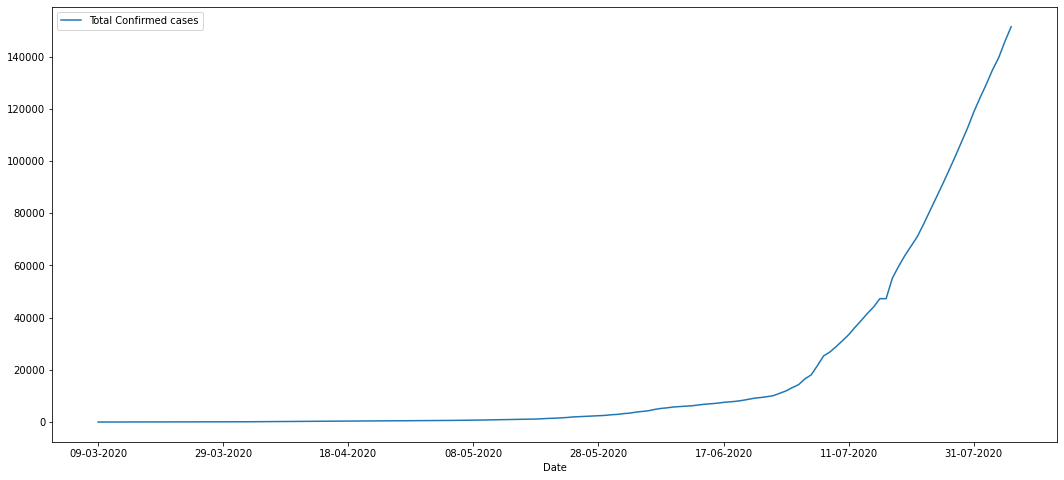

In [19]:
plt.figure(figsize=(18,8))
df2.plot.line(x = 'Date', y = 'Total Confirmed cases',figsize=(18,8))
plt.show()

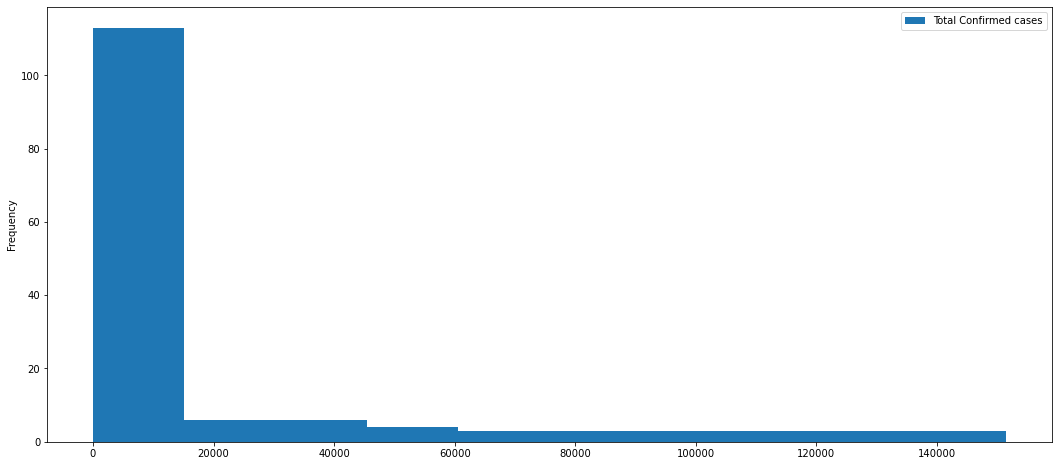

In [20]:
df2.plot.hist(x = 'Date', y = 'Total Confirmed cases', figsize=(18,8))
plt.show()

In [21]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR

In [22]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [23]:
X = df2['Total Confirmed cases'].values
print(len(X))

147


In [24]:
X = np.log(X)
#plt.plot(X)

In [25]:
train, test = X[0:X.shape[0]-30], X[X.shape[0]-30:]

In [26]:
print(train)

[ 0.          1.38629436  1.38629436  1.38629436  1.60943791  1.79175947
  1.79175947  1.79175947  2.39789527  2.39789527  2.63905733  2.7080502
  2.7080502   3.25809654  3.49650756  3.61091791  3.71357207  4.00733319
  4.00733319  4.00733319  4.33073334  4.38202663  4.41884061  4.61512052
  4.70048037  4.82028157  4.85203026  4.9698133   5.01727984  5.01727984
  5.16478597  5.19849703  5.19849703  5.33271879  5.36597602  5.44673737
  5.55295958  5.56068163  5.63121178  5.86646806  5.88332239  5.95064255
  5.96614674  6.01126717  6.03548143  6.05678401  6.09807428  6.16120732
  6.2146081   6.22059017  6.23832463  6.25958146  6.28226675  6.33682573
  6.37842618  6.39859493  6.41999493  6.47850964  6.50876914  6.54103
  6.5581978   6.62406523  6.67708346  6.74288064  6.75925527  6.82979374
  6.86589107  6.89467004  6.96224346  6.99576616  7.04490512  7.1276937
  7.24208236  7.28756064  7.38087904  7.46336305  7.58018942  7.64444076
  7.68799717  7.73324565  7.79069603  7.83715965  7.9305

In [27]:
print(test)

[10.19671671 10.27080071 10.34512386 10.41684996 10.49725629 10.56728316
 10.63539861 10.69369338 10.76327142 10.76327142 10.91717719 10.99628296
 11.0630695  11.11869699 11.17140652 11.23628883 11.30051164 11.3605898
 11.41797722 11.47357114 11.52746919 11.58059346 11.63074406 11.68378154
 11.72896383 11.76979002 11.81168842 11.84632871 11.89019684 11.92800421]


In [28]:
# train autoregression
model = sm.tsa.AutoReg(train, 12)
model_fit = model.fit()

In [29]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+29, dynamic=True)

In [30]:
test

array([10.19671671, 10.27080071, 10.34512386, 10.41684996, 10.49725629,
       10.56728316, 10.63539861, 10.69369338, 10.76327142, 10.76327142,
       10.91717719, 10.99628296, 11.0630695 , 11.11869699, 11.17140652,
       11.23628883, 11.30051164, 11.3605898 , 11.41797722, 11.47357114,
       11.52746919, 11.58059346, 11.63074406, 11.68378154, 11.72896383,
       11.76979002, 11.81168842, 11.84632871, 11.89019684, 11.92800421])

In [31]:
predictions

array([10.21989867, 10.35978141, 10.48896501, 10.60585267, 10.71187951,
       10.82397539, 10.91884364, 10.99829252, 11.09166944, 11.15638472,
       11.22400724, 11.29364691, 11.34444171, 11.39374816, 11.44182334,
       11.48603798, 11.52176374, 11.56054733, 11.59606645, 11.62544292,
       11.65925735, 11.68921039, 11.71770356, 11.74811121, 11.77773686,
       11.80633185, 11.83578492, 11.86675815, 11.89618318, 11.92705785])

In [32]:
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(test, predictions)
print('MSE: %f' % mse)

MSE: 0.042485


In [33]:
from math import sqrt
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.206119


In [34]:
print(rmse)

0.2061189693539319


In [35]:
print('Accuracy Score',1-rmse)

Accuracy Score 0.7938810306460681


In [36]:
Y = df2['Date']

In [37]:
years = Y[len(train):]

In [38]:
len(predictions)

30

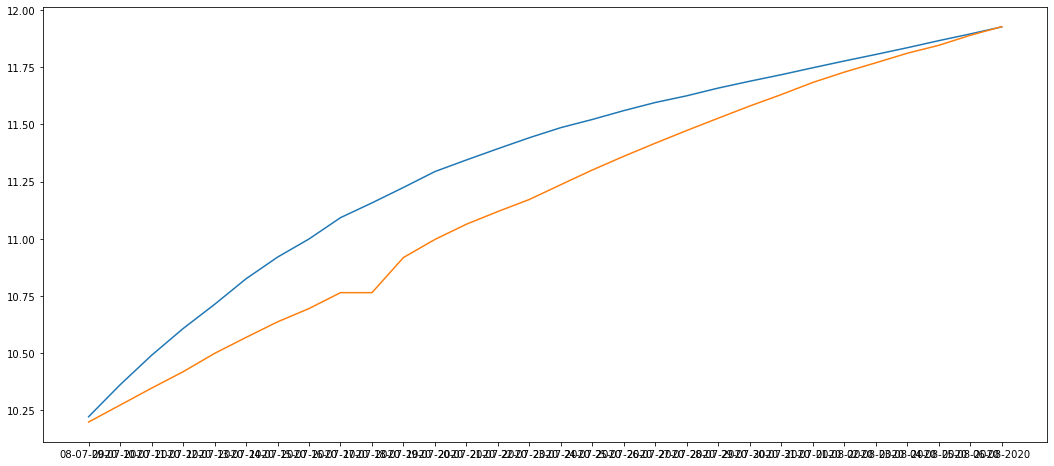

In [39]:
plt.figure(figsize=(18,8))
plt.plot(years, predictions, label='Predicted')
plt.plot(years, test, label='Actual')

# End...